# Histograms of Oriented Gradients for Human Detection
N. Dalal and B. Triggs
CVPR 2005

# Algorithm 
HOG feature extraction <br>
1.  Compute centered horizontal and vertical gradients with no smoothing <br>
2.  Compute gradient orientation and magnitudes<br>
3.  For color image, pick the color channel with the highest gradient magnitude for each pixel.<br>

# For Example

 For a 64x128 image,  <br>
 Divide the image into 16x16 blocks of 50% overlap.  <br>
 &emsp; 7x15=105 blocks in total  <br>
 Each block should consist of 2x2 cells with size 8x8.  <br>
 Quantize the gradient orientation into 9 bins   <br>
 &emsp; The vote is the gradient magnitude  <br> 
 &emsp; Interpolate votes bi-linearly between neighboring bin center.  <br>
 &emsp; The vote can also be weighted with Gaussian to downweight the pixels near the edges 
of the block. <br>
 Concatenate histograms (Feature dimension: 105x4x9 = 3,780) <br>

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage.io import imsave, imread,imshow
import cv2
from getHoG import *

Image shape (128, 64, 3)


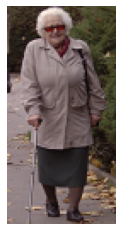

In [3]:
img=cv2.imread('Images/person_102.bmp')
print("Image shape",img.shape)
m, n,ch= img.shape
plt.imshow(img[...,::-1])
plt.axis('off')  # Turn of axis numbers and ticks
plt.show()

Lets first do HOG using opencv.

In [4]:
import cv2
hogopencv = cv2.HOGDescriptor()
h = hogopencv.compute(img)

In [5]:
h.shape

(3780, 1)

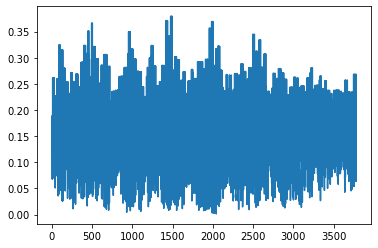

In [6]:
plt.plot(h)
plt.show()

# Exercise one

1. Implement HOG descriptor using numpy  

Starting Code

Last week, you have written your own code for computing image gradient and angle. For this example, we will use opencv function sobel


In [7]:
gx = cv2.Sobel(img, cv2.CV_32F, 1, 0, ksize=1)
gy = cv2.Sobel(img, cv2.CV_32F, 0, 1, ksize=1)

# Gradient magnitude and direction (in degrees)
magnitudes = np.sqrt(gx**2 + gy**2)
angles = (np.arctan2(gy, gx) * 180 / np.pi) % 360

max_magnitude=np.amax(magnitudes, axis=2)  
max_angle=np.amax(angles, axis=2)  
print(max_magnitude.shape)
print(max_angle.shape)

(128, 64)
(128, 64)


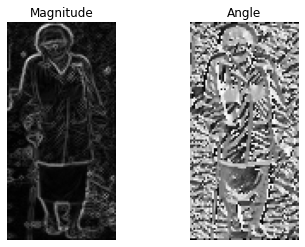

In [7]:
ax=plt.subplot(121)
ax.imshow(max_magnitude,cmap='gray')
ax.axis('off')  # Turn of axis numbers and ticks
ax.set_title("Magnitude")
ax=plt.subplot(122)
ax.imshow(max_angle,cmap='gray')
ax.axis('off')  # Turn of axis numbers and ticks
ax.set_title("Angle")
plt.show()

In [8]:
# We gonna use 9 bins with angle from 0-180
max_angle[max_angle < 0] = max_angle[max_angle < 0] + 180;
max_angle = max_angle % 180

In [9]:
cells=2
blocks=16
bins=9
cell_size=8


In [10]:
Yourhog=HOG(max_magnitude,max_angle, cells, cell_size, blocks, bins)

In [11]:
Yourhog.compute()

HOG implementation missing or Input not correct


[]